# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

Importing Linraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

Load the DataSet

In [222]:
#understanding the dataset
diabetes_data = pd.read_csv("diabetes.csv")

Exploratory Data Analysis

In [223]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [224]:
#summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The min value for features such as Glucose, BloodPressure, SkinThickness, Insulin, BMI is zero. 
which means there is missing value in form of 0 that should be handled

In [225]:
#how many rows and columns are present in the dataset
diabetes_data.shape

(768, 9)

In [226]:
#Are there missing values?
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [227]:
#display the top 5 rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [228]:
#display the bottom 5 rows
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [229]:
#Check data types
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

EDA using Data Visualization

Pair plot

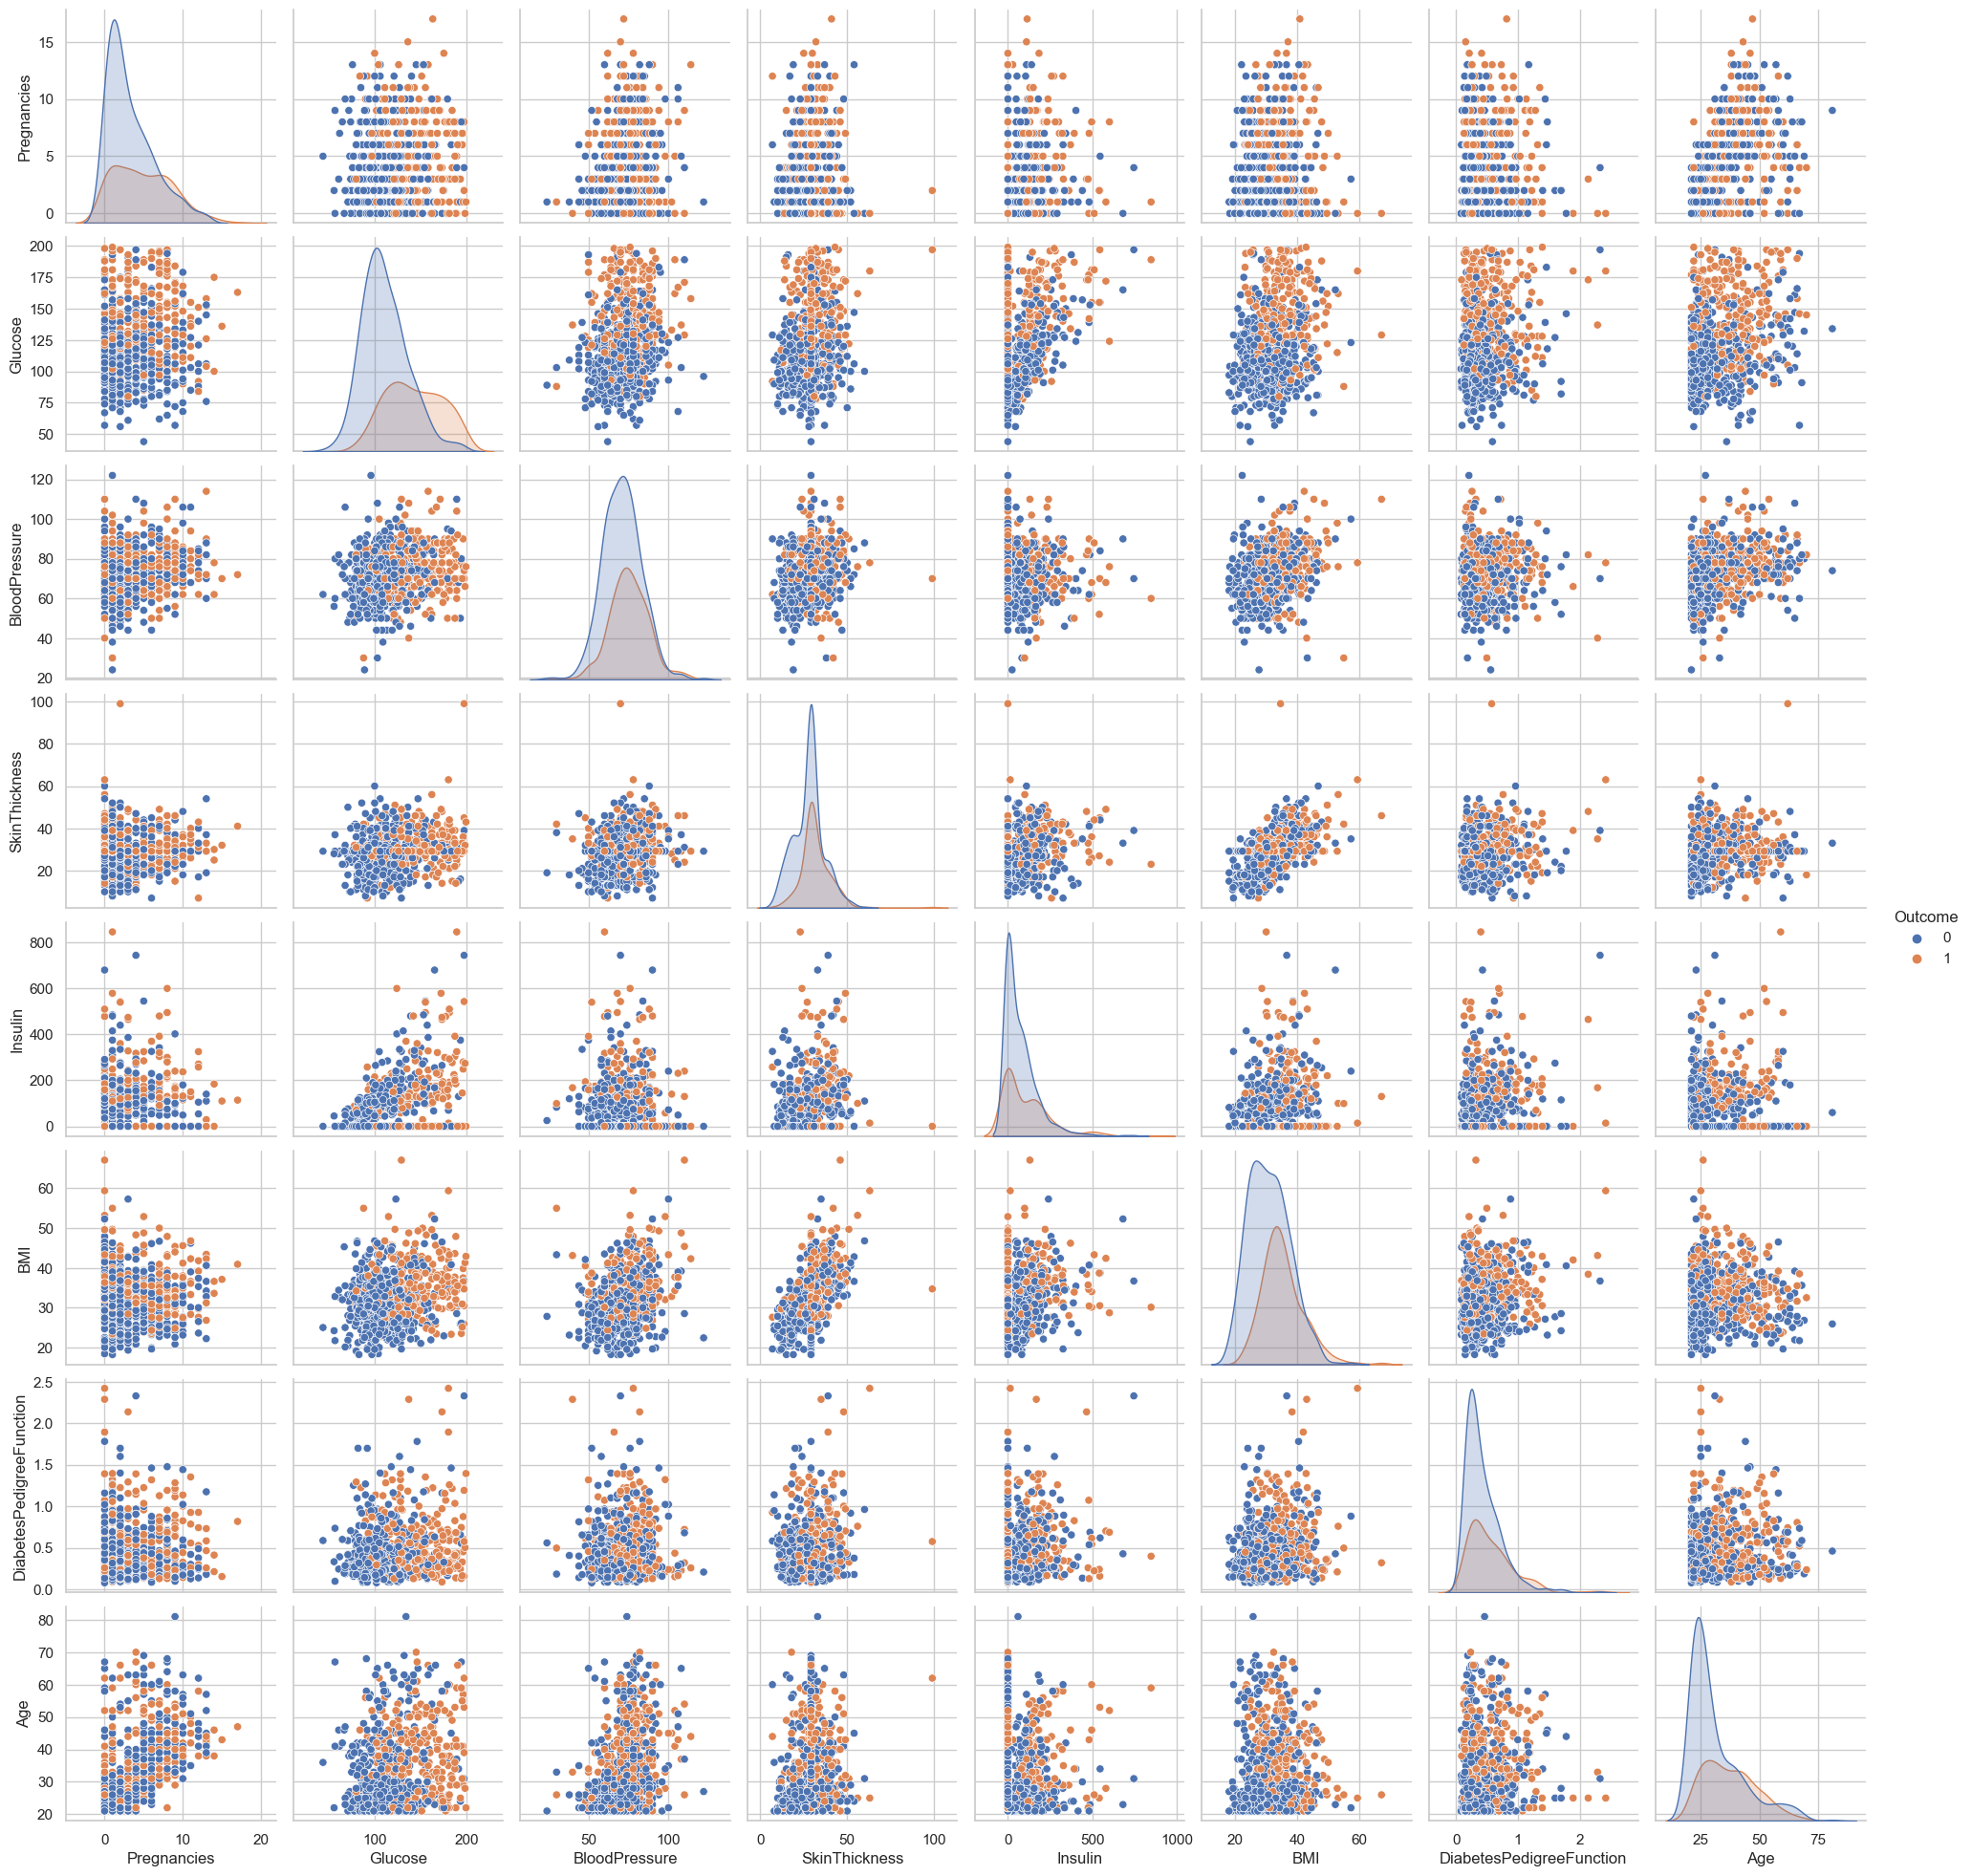

In [316]:
# we could colour the scatter plots based on a feature

sns.pairplot(diabetes_data, hue="Outcome")
plt.show()

# changes the default marginal plot to a kernal density estimate (KDE)

Distribution of features using instagram

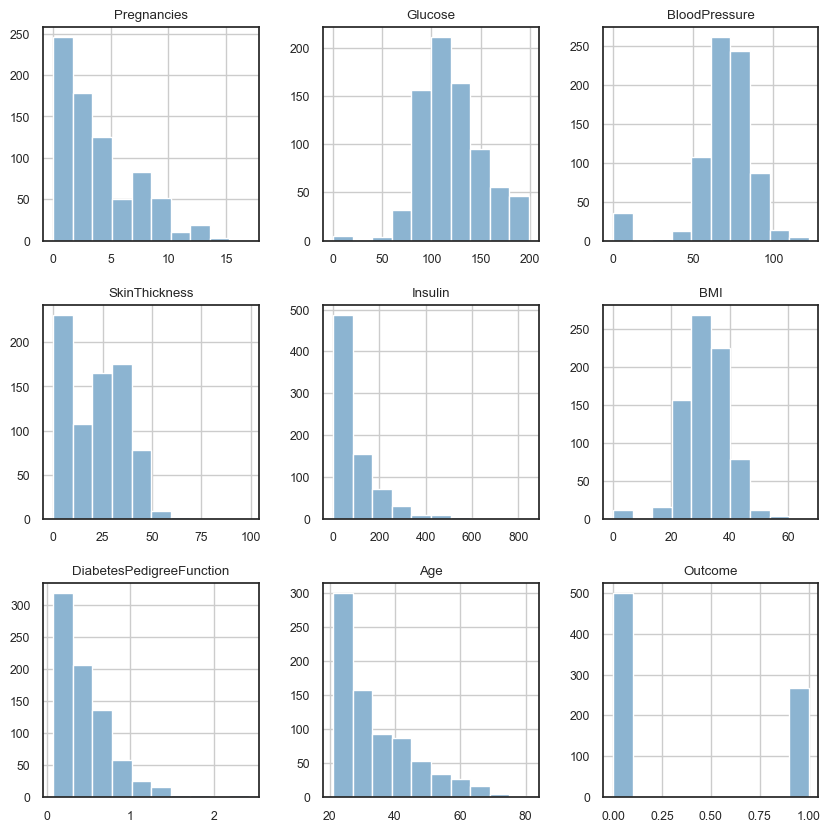

In [231]:
diabetes_data.hist(bins=10, figsize=(10,10), )
plt.show()

This shows distribution of features. it's also obvious from the distribution of insulin that it conatins outliers

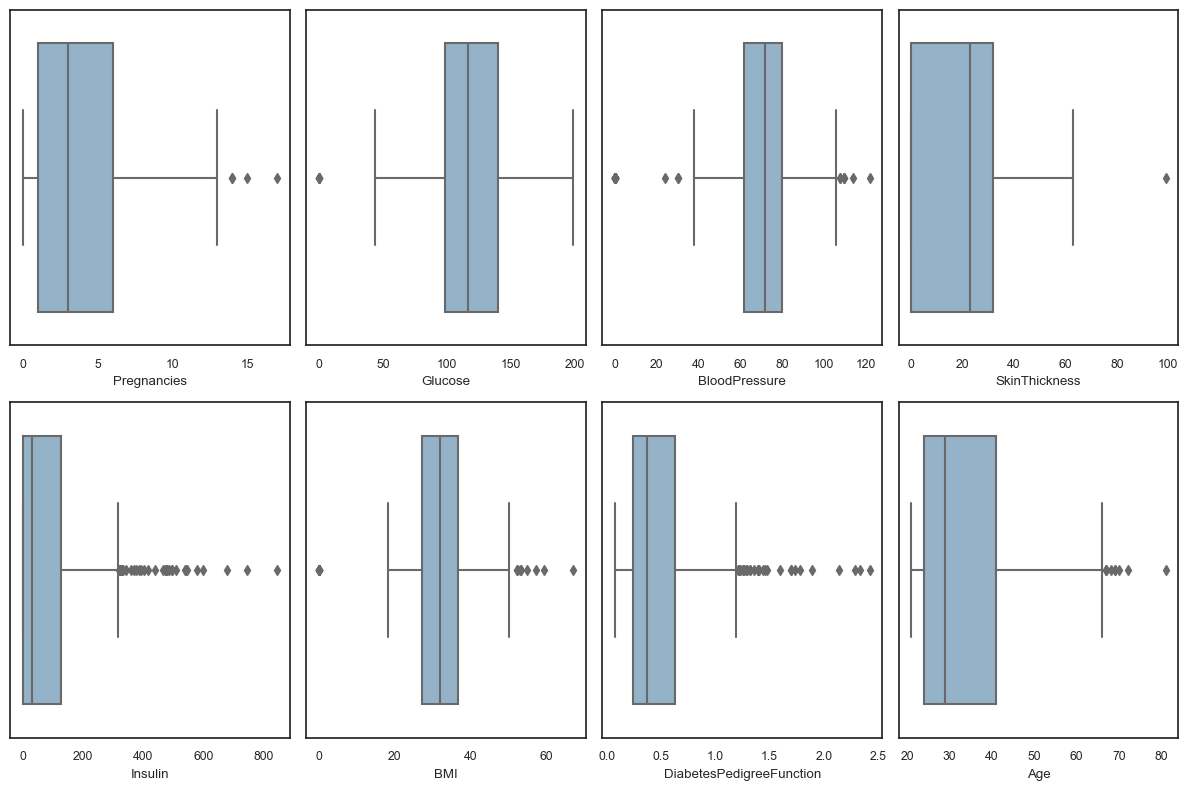

In [232]:
#check for outliers
# Select the continuous features for box plot
continuous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create box plots for each continuous feature to check for outliers
plt.figure(figsize=(12, 8))  # Set the size of the figure
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=diabetes_data[feature])
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


Insulin contains a lot of outliers, since it has lots of points beyond the upper whiskers of the box plot, which should be handled.

In [233]:
#check for correlation 
diabetes_data.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Glucose is the most highly correlated variable with outcome, followed by the body mass index BMI

Count Plot

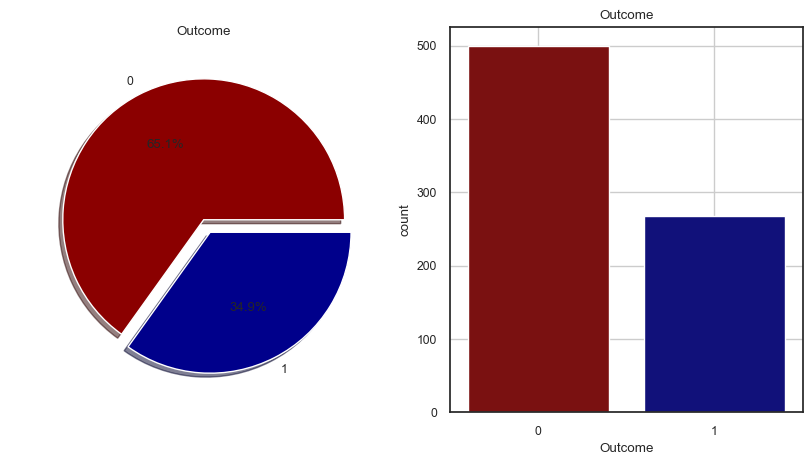

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Specify colors for the pie chart
colors = ['darkred', 'darkblue']

# Plot a pie chart to show the proportion of each category in the 'Outcome' variable
diabetes_data['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Outcome')
ax[0].set_ylabel(" ")

# Specify a color palette for the bar plot
color_palette = ['darkred', 'darkblue']

# Plot a bar plot to show the count of each category in the 'Outcome' variable
sns.barplot(x=diabetes_data['Outcome'].value_counts().index, y=diabetes_data['Outcome'].value_counts(), ax=ax[1], palette=color_palette)
ax[1].set_title('Outcome')

# Show the plots
plt.grid()
plt.show()


This shows that, out of the 768 observations contained in the dataset, 500 are not diabetic but 268 are.

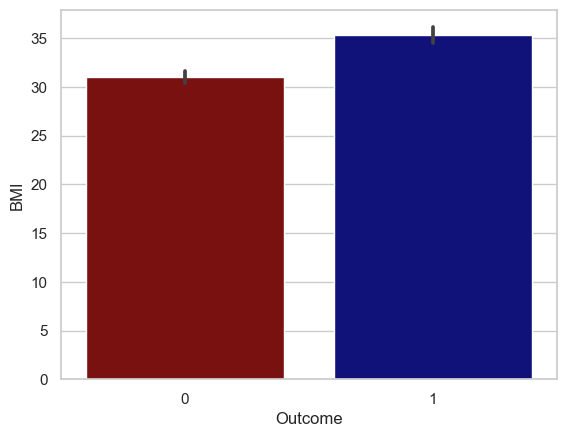

In [310]:
#average BMI for each outcome
plt.figure(figsize=(6.4,4.8)) 
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']

sns.barplot(data=diabetes_data, x='Outcome', y='BMI', palette=colors) #averages with error bars

plt.show()

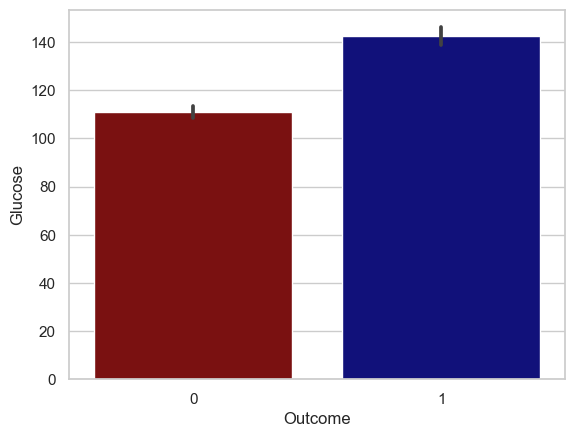

In [311]:
#average glucose level for individuals with diabetes and those without
plt.figure(figsize=(6.4,4.8)) 
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']
sns.barplot(data=diabetes_data, x='Outcome', y='Glucose', palette=colors) #averages with error bars

plt.show()

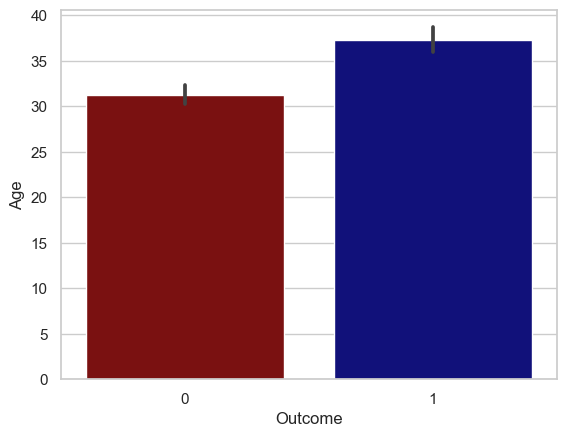

In [312]:
#average Age for each outcome
plt.figure(figsize=(6.4,4.8)) 
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']
sns.barplot(data=diabetes_data, x='Outcome', y='Age', palette=colors) 

plt.show()

Analysing relationship between features

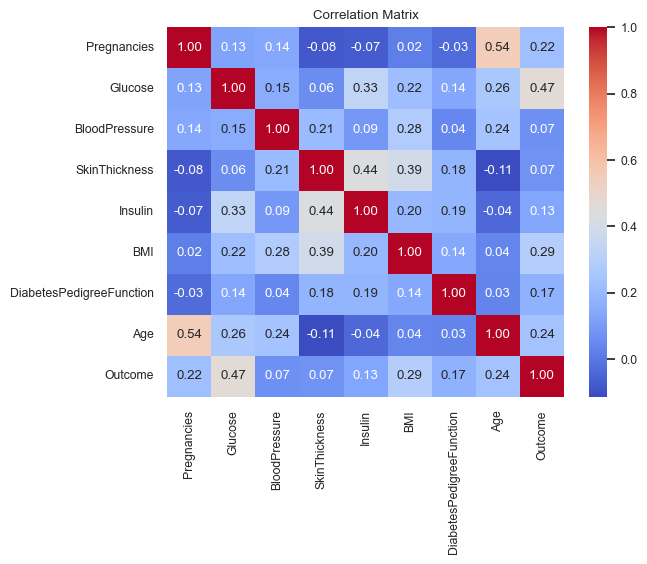

In [238]:
#check relationships between variables, using correclation matrix
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


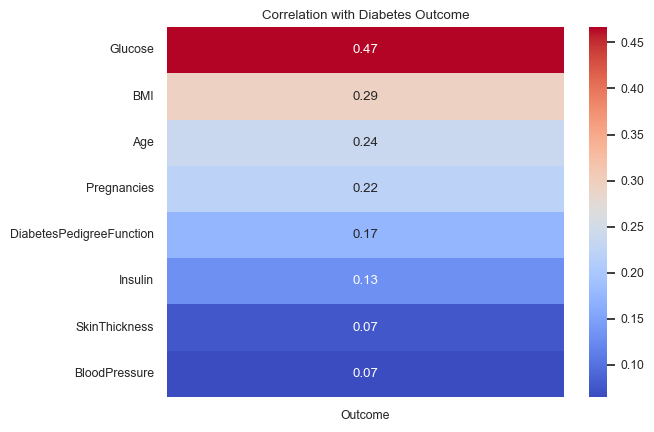

In [239]:
# Calculate the correlation between predictor variables and the outcome variable
corr = diabetes_data.corr()
target_corr = corr['Outcome'].drop('Outcome')  # Drop the 'Outcome' row since it's the correlation with itself

# Sort the correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Set the style and color palette for the plot
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")

# Create a heatmap to visualize the correlation with the outcome variable
sns.heatmap(target_corr_sorted.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation with Diabetes Outcome')
plt.show()


The correlation heatmap shows that there is a high correlation between Outcome and [pregancy, Glucose, bMI,]

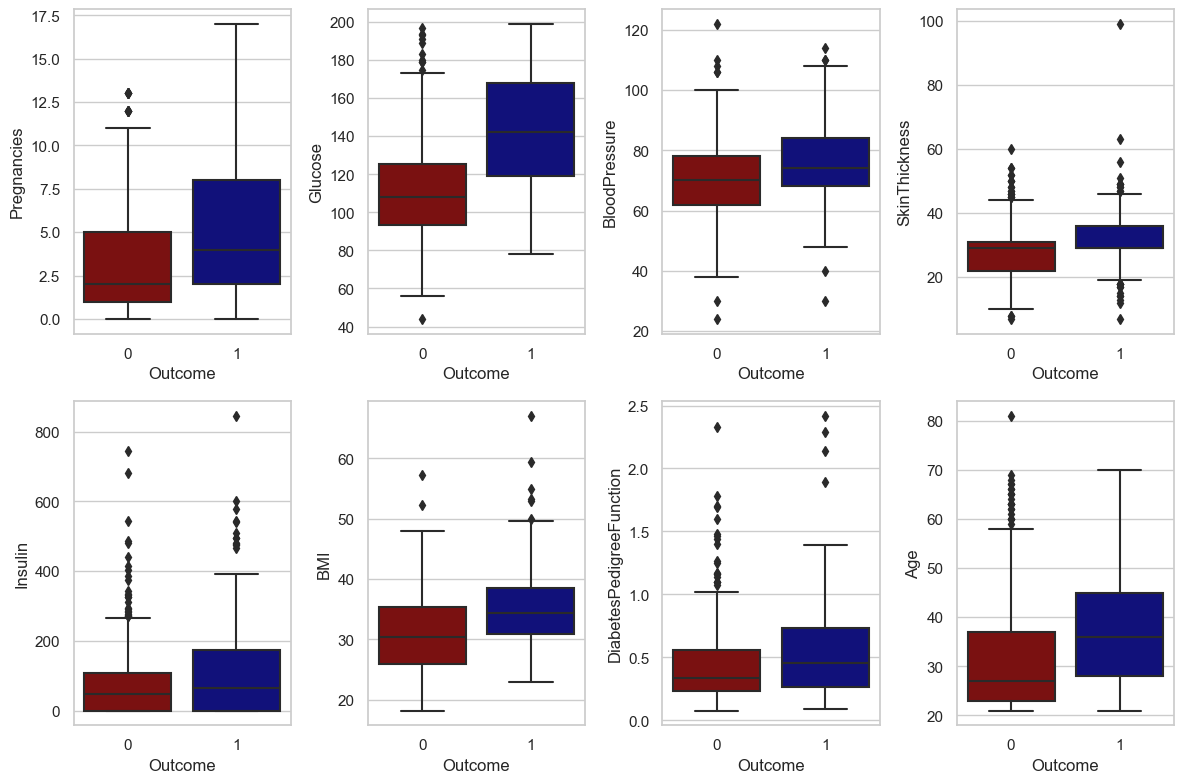

In [313]:
#distribution of predictor variable by outcome
continuous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create box plots to compare the distribution of continuous features for each outcome category
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette=colors)
    plt.xlabel('Outcome')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

Data Cleaning/Handling Missing Values 

In [241]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [242]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [243]:
#check how many zeros are there in each column
(diabetes_data['Insulin']==0).sum() 

for column_name in diabetes_data.columns:
    count = (diabetes_data[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 111
Num zeros in column Glucose is: 5
Num zeros in column BloodPressure is: 35
Num zeros in column SkinThickness is: 227
Num zeros in column Insulin is: 374
Num zeros in column BMI is: 11
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500


Majority of these could be assumed to be null values except in the case of pregnancies where it could be true.
The following columns; Glucose, Blood pressure, skinthickness and BMI would be changed to null, since general domain knowledges assures that they can't be zero for any human

In [244]:
# Handle zeros for columns with inappropriate zeros
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
diabetes_data[cols_missing_vals] = diabetes_data[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_data.isnull().sum()

# now they ware real Nan's and will be counted

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [245]:
print("Shape before dropping NAs", diabetes_data.shape)
#drop rows with glucose, BMI annd Bloodpressure as NAN
diabetes_data = diabetes_data.dropna(subset=['Glucose', 'BMI', 'BloodPressure']) 

print("Shape after dropping NAs for Glucose, BMI and BloodPressure columns", diabetes_data.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose, BMI and BloodPressure columns (724, 9)


In [246]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [247]:
# Fill in missing values with the average (for SkinThickness)
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].fillna(value=diabetes_data['SkinThickness'].mean())

diabetes_data.isnull().sum()

/var/folders/5q/zftjlh_13zv18kdqjrvzmxq40000gn/T/ipykernel_10705/2156121777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].fillna(value=diabetes_data['SkinThickness'].mean())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [248]:
#check the description of the DataFrame
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The range of values for insulin , 0 being min and 846 being maximum suggests there is need to rescale, as it also contains several outliers

Scaling and Normalization

In [249]:
target_variable = 'Outcome'

#separate feature for traget variable
y= diabetes_data[target_variable]

#Separate predictor features
X= diabetes_data.drop(target_variable, axis=1)

In [250]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,0,33.6,0.627,50
1,1,85.0,66.0,29.000000,0,26.6,0.351,31
2,8,183.0,64.0,29.182331,0,23.3,0.672,32
3,1,89.0,66.0,23.000000,94,28.1,0.167,21
4,0,137.0,40.0,35.000000,168,43.1,2.288,33


In [251]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Apply Feature Scaling

In [252]:
#Apply Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

Train Test Split

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size = 0.2, random_state=7)

In [254]:
X_train.shape, y_train.shape

((579, 8), (579,))

In [255]:
X_test.shape, y_test.shape

((145, 8), (145,))

Build Classification algorithims

Logistic regression

In [256]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

KNeighboursClassifiers (KNN)

In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

Support vector Machine

In [258]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC()

Random forest

In [259]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

In [260]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Making Predictions

Making prediction on test dataset using logistic regression

In [261]:
#confirm shape of X_test
X_test.shape

(145, 8)

In [262]:
#make predictions on test dataset
lr_pred= lr.predict(X_test)
lr_pred.shape

(145,)

Making prediction on test dataset using KNN

In [263]:
knn_pred=knn.predict(X_test)
knn_pred.shape

(145,)

Making prediction on test dataset using SVM

In [264]:
sv_pred = sv.predict(X_test)
sv_pred.shape

(145,)

Making prediction on test dataset using Random forest

In [265]:
rf_pred= rf.predict(X_test)
rf_pred.shape

(145,)

Making prediction on test dataset using Decision tree

In [266]:
dt_pred=dt.predict(X_test)
dt_pred.shape

(145,)

Model Evaluation

Train and Test Scores

In [267]:
#Train and test scores for logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
print("Train Accuracy of logistic regression", lr.score(X_train,y_train)*100)
print("accuracy (Test) score of Logistic regression", lr.score(X_test, y_test)*100)
print("accuracy(Test) score of Logistic Regression", accuracy_score(y_test, lr_pred)*100)


Train Accuracy of logistic regression 78.06563039723662
accuracy (Test) score of Logistic regression 77.93103448275862
accuracy(Test) score of Logistic Regression 77.93103448275862


In [268]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       101
           1       0.68      0.52      0.59        44

    accuracy                           0.78       145
   macro avg       0.74      0.71      0.72       145
weighted avg       0.77      0.78      0.77       145



In [269]:
#confusion matrix of logistic regression
cm = confusion_matrix(y_test, lr_pred)
cm

array([[90, 11],
       [21, 23]])

<Axes: >

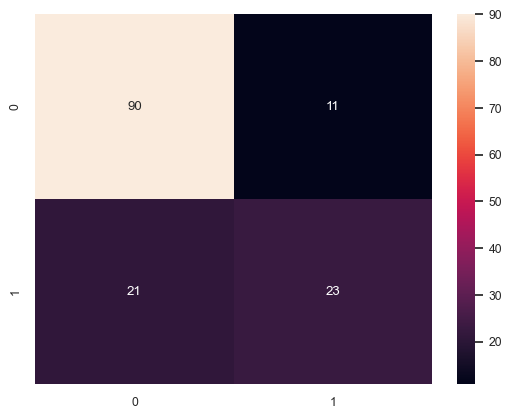

In [270]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')

In [271]:
True_Negative = cm[0,0]
False_Positive = cm[0,1]
False_Negative = cm[1,0]
True_Positive = cm[1,1]

In [272]:
True_Negative, False_Positive, False_Negative, True_Positive

(90, 11, 21, 23)

In [273]:
#Making Confusion matrix of Logistic regression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
cm = confusion_matrix(y_test, lr_pred)

print('accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

accuracy Rate: 77.93103448275862
Misclassification rate: 22.06896551724138


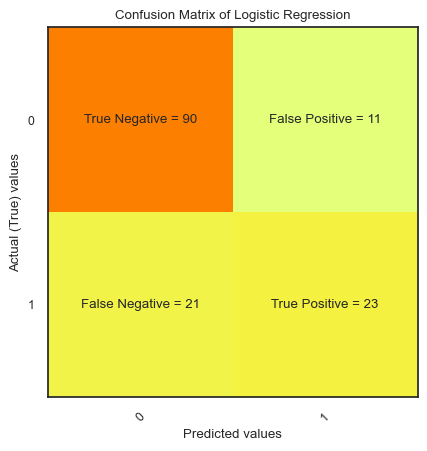

In [274]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

ClassNames = ['0', '1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual (True) values')
plt.xlabel('Predicted values')

tick_marks = np.arange(len(ClassNames))
plt.xticks(tick_marks, ClassNames, rotation=45)  # Fixed typo: "xt" to "xticks"
plt.yticks(tick_marks, ClassNames)

# Display the values inside the confusion matrix
s = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), ha='center', va='center')

plt.show()


In [275]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,90,11
1,21,23


In [276]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,90,11,101
1,21,23,44
All,111,34,145


In [277]:
pd.crosstab(y_test, lr_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,90,11,101
1,21,23,44
All,111,34,145


PRECISION

Precision = TP/(TP+FP)

Where TP = True Positive 
      FP = False Positive

In [278]:
precision = True_Positive/(True_Positive+False_Positive)
precision

0.6764705882352942

In [279]:
#print precision score
Precision_score = True_Positive / float(True_Positive +False_Positive)*100 
print('Precision score: {0:0.4f}'.format(Precision_score))

Precision score: 67.6471


In [280]:
print('Classification report of Logistic Regression: \n', classification_report(y_test, lr_pred, digits=4))

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8108    0.8911    0.8491       101
           1     0.6765    0.5227    0.5897        44

    accuracy                         0.7793       145
   macro avg     0.7436    0.7069    0.7194       145
weighted avg     0.7700    0.7793    0.7704       145



RECALL (true Positive Rate (TPR))
Ratio of correctly predicted positive (TP) observations to the total observations which are actually true

In [281]:
recall_score = True_Positive/ float(True_Positive + False_Negative) *100
print('recall_score', recall_score)

recall_score 52.27272727272727


FALSE POSITIVE RATE FPR

In [282]:
FPR = False_Positive/ float(False_Positive + True_Negative)*100
print('False Positive Rate : {0:0.4}'.format(FPR))

False Positive Rate : 10.89


SPECIFICITY

In [283]:
specificity = True_Negative / (True_Negative +False_Positive)*100
print('Specificity : {0:0.4}'.format(specificity))

Specificity : 89.11


F1_Score

In [284]:
print('F1_score of macro :', f1_score(y_test, lr_pred)*100)

F1_score of macro : 58.97435897435898


In [285]:
print("Micro Average F1_score is:", f1_score(y_test, lr_pred,average='micro')*100)
print("Macro Average F1_score is:", f1_score(y_test, lr_pred,average='macro')*100)
print("Weighted Average F1_score is:", f1_score(y_test, lr_pred,average='weighted')*100)
print("F1_score on Non weighted score is:", f1_score(y_test, lr_pred,average=None)*100)

Micro Average F1_score is: 77.93103448275862
Macro Average F1_score is: 71.94000967585875
Weighted Average F1_score is: 77.03685167575864
F1_score on Non weighted score is: [84.90566038 58.97435897]


Compare this with the fi scores in the classification report

In [286]:
print('Classification report of Logistic Regression: \n', classification_report(y_test, lr_pred, digits=4))

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8108    0.8911    0.8491       101
           1     0.6765    0.5227    0.5897        44

    accuracy                         0.7793       145
   macro avg     0.7436    0.7069    0.7194       145
weighted avg     0.7700    0.7793    0.7704       145



ROC Curve and ROC AUC
ROC stand for receiver Operating Characteristics. tells how good the model can distinguish between two things. Such as if a patient have diabetics or not

AUC stand for Area Under Curve, helps to choose the best model from the models for which we have plotted the ROC curve

In [287]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the logistic regression model
auc = roc_auc_score(y_test, lr_pred)

# Print the AUC score
print("ROC AUC SCORE of Logistic regression is", auc)


ROC AUC SCORE of Logistic regression is 0.706908190819082


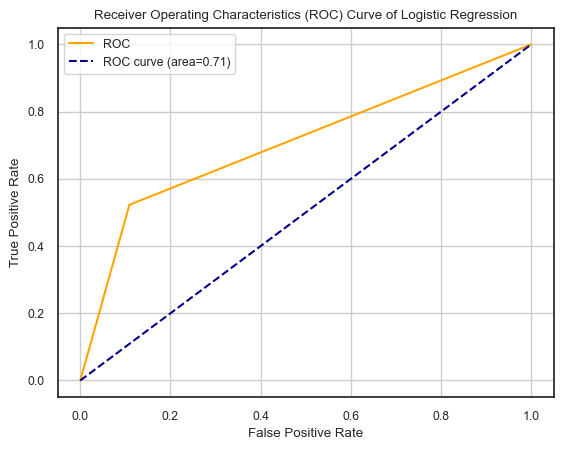

In [288]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the Area Under the ROC Curve (AUC) for the logistic regression model
auc = roc_auc_score(y_test, lr_pred)

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()


KNN MoDEL

In [289]:
#Train and test scores of knn
print("Train Accuracy of KNN", knn.score(X_train,y_train)*100)
print("accuracy (Test) score of KNN", knn.score(X_test, y_test)*100)
print("accuracy score of KNN", accuracy_score(y_test, knn_pred)*100)


Train Accuracy of KNN 81.00172711571675
accuracy (Test) score of KNN 75.17241379310344
accuracy score of KNN 75.17241379310344


Confusion Matrix of "KNN"

<Axes: >

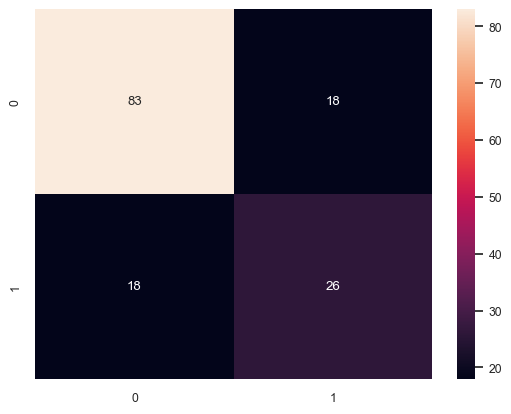

In [290]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d')

In [291]:
#Making Confusion matrix of KNN
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
cm = confusion_matrix(y_test, knn_pred)

print('TN - True negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False negative {}'.format(cm[1,0]))
print('TP - True positive {}'.format(cm[0,1]))
print('accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True negative 83
FP - False Positive 18
FN - False negative 18
TP - True positive 18
accuracy Rate: 75.17241379310344
Misclassification rate: 24.82758620689655


In [292]:
#Classification Report of KNN
print('Classification report of KNN: \n', classification_report(y_test, knn_pred, digits =4))

Classification report of KNN: 
               precision    recall  f1-score   support

           0     0.8218    0.8218    0.8218       101
           1     0.5909    0.5909    0.5909        44

    accuracy                         0.7517       145
   macro avg     0.7063    0.7063    0.7063       145
weighted avg     0.7517    0.7517    0.7517       145



Area Under Curve of KNN

In [293]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the logistic regression model
auc = roc_auc_score(y_test, knn_pred)

# Print the AUC score
print("ROC AUC SCORE of KNN is", auc)


ROC AUC SCORE of KNN is 0.7063456345634563


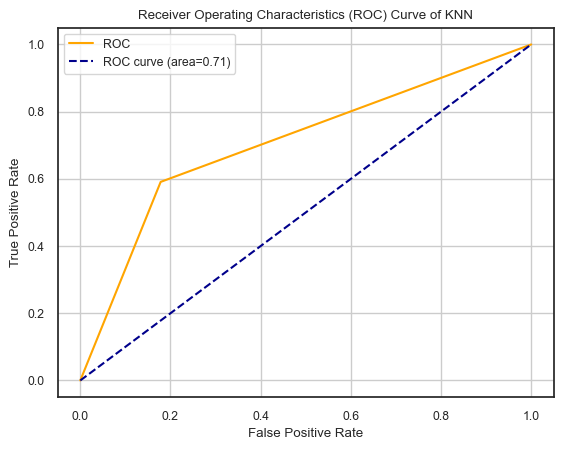

In [294]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of KNN')
plt.legend()
plt.grid()
plt.show()


SVM Model

In [295]:
#Train and test scores of SVM
print("Train Accuracy of SVM", sv.score(X_train,y_train)*100)
print("accuracy (Test) score of SVM", sv.score(X_test, y_test)*100)
print("accuracy score of SVM", accuracy_score(y_test, sv_pred)*100)


Train Accuracy of SVM 83.93782383419689
accuracy (Test) score of SVM 75.17241379310344
accuracy score of SVM 75.17241379310344


Confusion Matrix of "SVM

In [296]:
#Making Confusion matrix of SVM
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
cm = confusion_matrix(y_test, sv_pred)

print('TN - True negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False negative {}'.format(cm[1,0]))
print('TP - True positive {}'.format(cm[0,1]))
print('accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True negative 85
FP - False Positive 16
FN - False negative 20
TP - True positive 16
accuracy Rate: 75.17241379310344
Misclassification rate: 24.82758620689655


Area Under Curve of SVM

In [297]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the SVM model
auc = roc_auc_score(y_test, sv_pred)

# Print the AUC score
print("ROC AUC SCORE of SVM is", auc)


ROC AUC SCORE of SVM is 0.6935193519351935


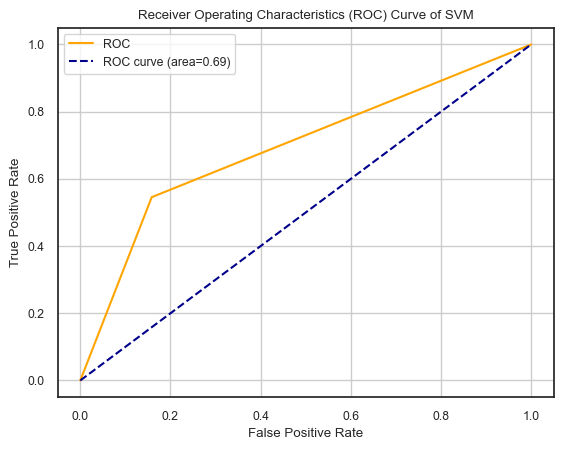

In [298]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of SVM')
plt.legend()
plt.grid()
plt.show()


In [299]:
#Classification Report of KNN
print('Classification report of KNN: \n', classification_report(y_test, sv_pred, digits =4))

Classification report of KNN: 
               precision    recall  f1-score   support

           0     0.8095    0.8416    0.8252       101
           1     0.6000    0.5455    0.5714        44

    accuracy                         0.7517       145
   macro avg     0.7048    0.6935    0.6983       145
weighted avg     0.7459    0.7517    0.7482       145



Decision Tree Model

Confusion Model for decision tree

In [300]:
#Train and test scores of decision tree
print("Train Accuracy of Decision Tree", dt.score(X_train,y_train)*100)
print("accuracy (Test) score of Decision Tree", dt.score(X_test, y_test)*100)
print("accuracy score of Decision Tree", accuracy_score(y_test, dt_pred)*100)


Train Accuracy of Decision Tree 100.0
accuracy (Test) score of Decision Tree 70.34482758620689
accuracy score of Decision Tree 70.34482758620689


In [301]:
#Making Confusion matrix of DT
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
cm = confusion_matrix(y_test, dt_pred)

print('TN - True negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False negative {}'.format(cm[1,0]))
print('TP - True positive {}'.format(cm[0,1]))
print('accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True negative 73
FP - False Positive 28
FN - False negative 15
TP - True positive 28
accuracy Rate: 70.34482758620689
Misclassification rate: 29.655172413793103


Area under Curve of Decision tree

In [302]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the decisiom tree model
auc = roc_auc_score(y_test, dt_pred)

# Print the AUC score
print("ROC AUC SCORE of Decision tree is", auc)


ROC AUC SCORE of Decision tree is 0.690931593159316


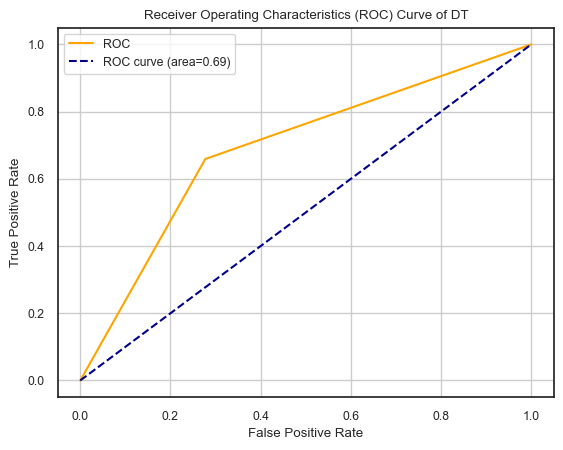

In [303]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of DT')
plt.legend()
plt.grid()
plt.show()


Random Forest Model

In [304]:
#Train and test scores of Random Forest
print("Train Accuracy of Random Forest", rf.score(X_train,y_train)*100)
print("accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print("accuracy score of Random Forest", accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 100.0
accuracy (Test) score of Random Forest 77.24137931034483
accuracy score of Random Forest 77.24137931034483


Confusion Matrix of Random Forest

In [305]:
#Making Confusion matrix of DT
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
cm = confusion_matrix(y_test, rf_pred)

print('TN - True negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False negative {}'.format(cm[1,0]))
print('TP - True positive {}'.format(cm[0,1]))
print('accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True negative 89
FP - False Positive 12
FN - False negative 21
TP - True positive 12
accuracy Rate: 77.24137931034483
Misclassification rate: 22.758620689655174


Area Under Curve of Random Forest Model

In [306]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the decisiom tree model
auc = roc_auc_score(y_test, rf_pred)

# Print the AUC score
print("ROC AUC SCORE of Random Forest is", auc)


ROC AUC SCORE of Random Forest is 0.701957695769577


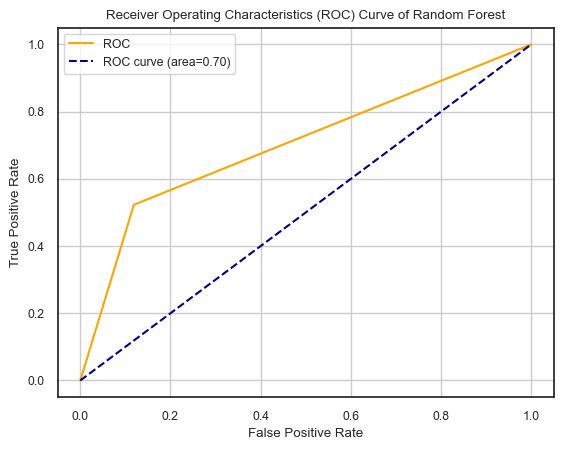

In [307]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of Random Forest')
plt.legend()
plt.grid()
plt.show()


Comparing the Models

In [308]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary or list to store the models and their names or labels
models = {
    'Logistic Regression': lr,
    'k-Nearest Neighbors': knn,
    'SVC': sv,
    'Random Forest Classifier': rf,
    'Decision Tree Classifier': dt
}

# Loop through each model and calculate the evaluation metrics
for model_name, model in models.items():
    # Make predictions on the test dataset using the current model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics for the current model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Check if the current model supports predict_proba() method (e.g., for classifiers)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Print the evaluation metrics for the current model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.78
Precision: 0.68
Recall: 0.52
F1-score: 0.59
ROC-AUC: 0.83


Model: k-Nearest Neighbors
Accuracy: 0.75
Precision: 0.59
Recall: 0.59
F1-score: 0.59
ROC-AUC: 0.77


Model: SVC
Accuracy: 0.75
Precision: 0.60
Recall: 0.55
F1-score: 0.57


Model: Random Forest Classifier
Accuracy: 0.77
Precision: 0.66
Recall: 0.52
F1-score: 0.58
ROC-AUC: 0.82


Model: Decision Tree Classifier
Accuracy: 0.70
Precision: 0.51
Recall: 0.66
F1-score: 0.57
ROC-AUC: 0.69




# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

** Blood Glucose level is high determinant of whether a person is diabetic or not
** The EDA revealed that there are more people without diabetes (500), than those who had diabetes (268)
** Comparing the Models, Logistic Regression and Random forest demonstrated high performance, making them a very goog and promising choice of model for predicting diabetes in patients
** further Exploration and fine_tuning of the Model could potentially enhance their performance